# Bencharking Sophia

This benchmark compares the performances of the [sophia](https://github.com/pchampin/sophia_rs) library
with other RDF libraries.

It was executed on an Intel® Core™ i7-10510U CPU @ 1.80GHz with 8 cores and 16 GiB of RAM.
See [benchmark_results.ipynb](./benchmark_results.ipynb) for more results on the tested configurations.

In [1]:
%matplotlib inline
from plot_utils import *

## The `query` test

This test consists in loading an N-Triple file in memory,
and querying all the triples with a given subject and object.

It has been tested with the following tools:

* `jena`: [Apache Jena](http://jena.apache.org/) 4.7.0 compiled and executed with OpenJDK 19.0.1
* `n3js`: [N3.js](https://github.com/rdfjs/N3.js#readme) 1.0.0-beta.1 executed with Node.js v10.15.2
* `librdf`: [librdf](http://librdf.org/) 1.0.17 compiled with clang 9.0.0-2
* `python`: [RDFlib](http://rdflib.readthedocs.org/) 4.2.2 executed with Python 3.7.5
* `sophia`: [sophia](https://github.com/pchampin/sophia_rs) v0.3.0 compiled with rustc 1.41.0
  (using [FastGraph](https://docs.rs/sophia/latest/sophia/graph/inmem/type.FastGraph.html))*
* `sophia_lg`: [sophia](https://github.com/pchampin/sophia_rs) v0.3.0 compiled with rustc 1.41.0
  (using [LightGraph](https://docs.rs/sophia/latest/sophia/graph/inmem/type.LightGraph.html))*
  

\* these tests were performed with the CPUs throttled down from 4GHz to 3.5GHz, because they were overheating... So `sophia` is slighly handicaped compared to the other implementations.


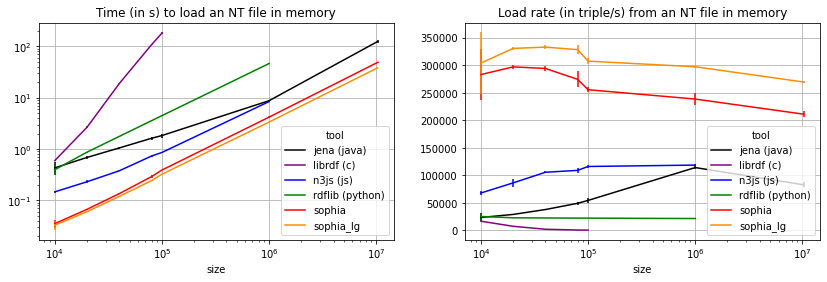

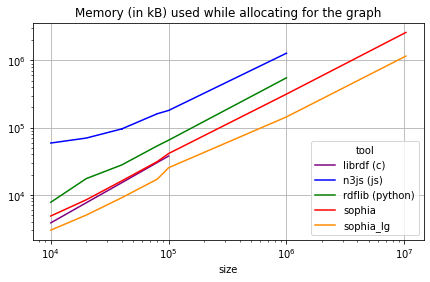

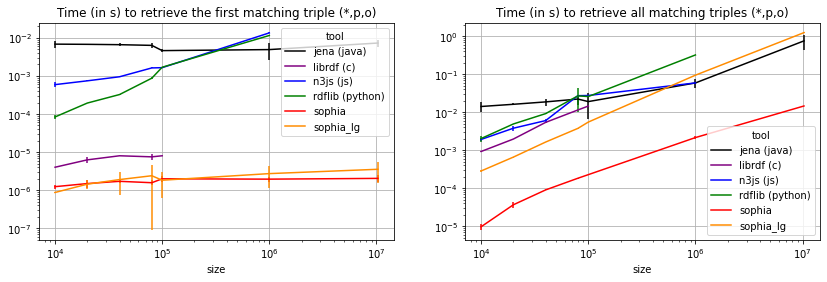

In [2]:
plot_query_stats(load_data("query", "sophia", "sophia_lg", "librdf", "jena", "n3js", "python"), group=True)

## The `parse` test

This test consists in parsing an N-Triple file without storing the triples.
The purpose is to evaluate the performances of the *parser*.

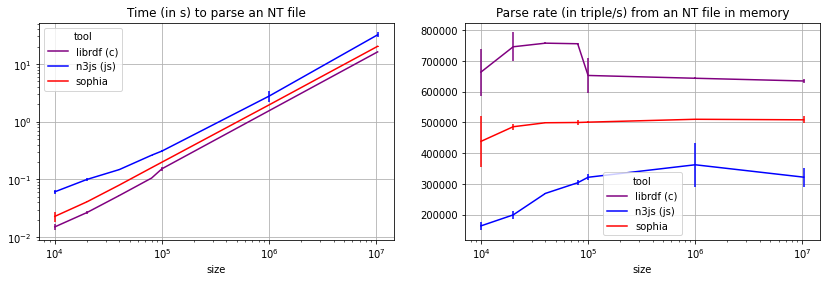

In [3]:
plot_parse_stats(load_data("parse", "sophia", "librdf", "n3js"), group=True)

## Evolution of Sophia

The following graphs compare different versions of Sophia:

* v0.1.0 compiles with rustc v1.35
* v0.2.0 compiled with rustc v1.35
* v0.3.0 compiled with rustc v1.41
* v0.4.0 compiled with rustc v1.41
* v0.5.2 compiled with rustc v1.43

### Evolution of the `query` test

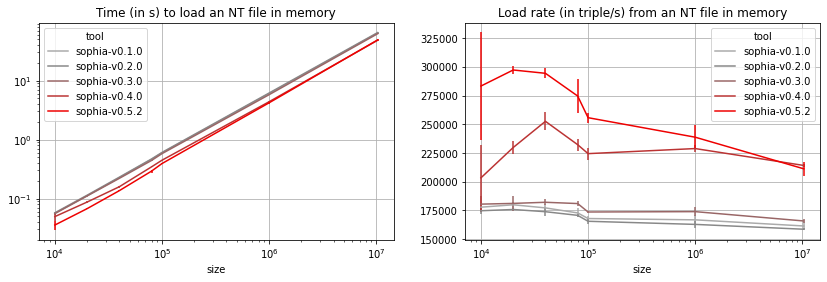

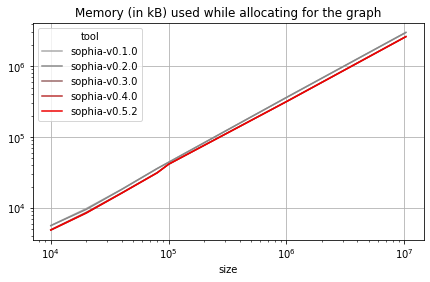

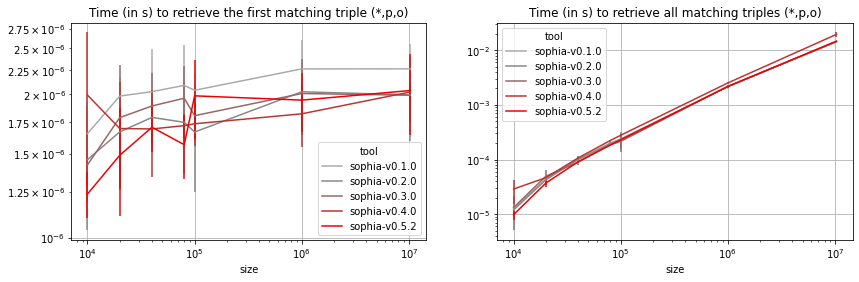

In [4]:
VERSIONS = {
    "sophia-v0.1.0": "#AAAAAA",
    "sophia-v0.2.0": "#888888",
    "sophia-v0.3.0": "#996666",
    "sophia-v0.4.0": "#BB3333",
    "sophia-v0.5.2": "#EE0000",
}

plot_query_stats(load_data("query", *VERSIONS), color_key=VERSIONS, group=True)

### Evolution of the `parse` test

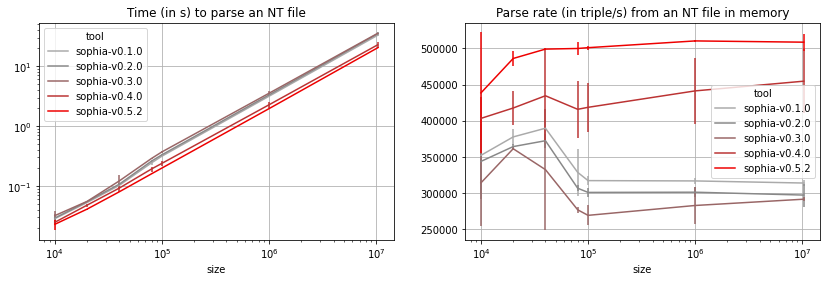

In [5]:
plot_parse_stats(load_data("parse", *VERSIONS), color_key=VERSIONS, group=True)